In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siddarth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siddarth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
# Read data
df = pd.read_csv('rejections.csv')
df.head()

,Date,Time,Day,Hour,Subject,Text
0,2018-07-12 12:31:08,12:31:08,Thurs,12,Your IBM Application,Ref: 110127BR - 2018 Data Scientist Internship...
1,2018-06-12 16:30:28,16:30:28,Tues,16,Thank you from Workday!,"<!doctype html><html xmlns:o=3D""urn:schemas-mi..."
2,2018-05-17 08:43:38,08:43:38,Thurs,8,An Update Regarding Your Visa Job Application,"\r\nDear Conor,\r\nThank you for giving us the..."
3,2018-05-01 15:21:05,15:21:05,Tues,15,Thank you for your interest in Zynga for Inter...,<html><head>\r\n<meta http-equiv=3DContent-Typ...
4,2018-04-26 14:49:02,14:49:02,Thurs,14,Your Application with Cambia Health Solutions,"Dear Conor,\r\n=C2=A0\r\nThank you for the int..."


In [3]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
Date       86 non-null object
Time       86 non-null object
Day        86 non-null object
Hour       86 non-null int64
Subject    86 non-null object
Text       86 non-null object
dtypes: int64(1), object(5)
memory usage: 4.1+ KB


In [4]:
# Subject list
df['Subject'].value_counts()

Your Uber Application                                                                                           2
BlackRock | We Wish You Success                                                                                 2
Thanks for your Application!                                                                                    2
Update - Data Analytics Intern - Undergraduate & Masters Degrees,\r\n 1765077                                   2
Thank you for your interest                                                                                     2
Illumina: Status of your application                                                                            2
Your application to Software Engineer, Intern 2018 (San Francisco)\r\n at Airbnb                                2
Update on VMware Role R04960 Intern- Data Science                                                               1
Your application for the Data Team Intern position at Factual                           

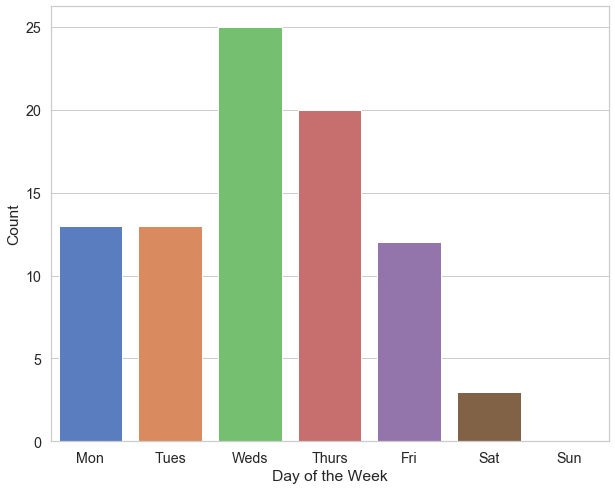

In [5]:
# Visualization
plt.figure(figsize=(10,8))
sns.countplot(df['Day'], order=['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']);
plt.xlabel('Day of the Week')
plt.ylabel('Count');

### Key Insights

Rejections most frequently came on Wednesdays

Thursdays also appear to be a popular day for bad news

In [6]:
# Subset data
sat = df.loc[df['Day'] == 'Sat']
sat.head()

,Date,Time,Day,Hour,Subject,Text
46,2017-12-16 15:04:42,15:04:42,Sat,15,Important information about your application t...,"Hi Conor,\r\nThank you for applying to Softwar..."
63,2017-11-04 07:27:04,07:27:04,Sat,7,Thank you for your interest in TripAdvisor,"Hi Conor,\r\n\r\nThank you for your interest i..."
69,2017-09-30 13:02:53,13:02:53,Sat,13,Thank you for your interest,"<div><img src=""https://performancemanager4.suc..."


In [7]:
# First offender: LendUp
print(sat.iloc[0]['Subject'])
print(sat.iloc[0]['Text'])

Important information about your application to LendUp
Hi Conor,
Thank you for applying to Software Engineering Intern. After reviewing with the team, we have decided not to move forward with your candidacy. Due to the number of applications we receive we are not able to provide specific feedback.

We will keep your details on file and let you know if any suitable openings arise.

Thanks again for your interest in LendUp and we wish you the best of luck in your search!

Regards,
LendUp Recruiting Team


## What time are job rejections most frequent 

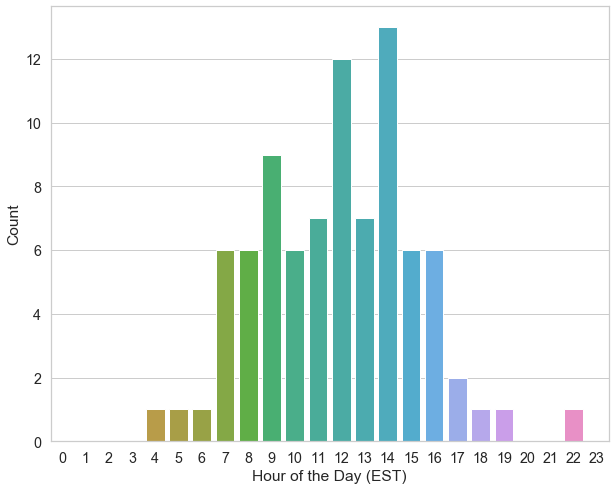

In [8]:
# Visualization
plt.figure(figsize=(10,8))
sns.countplot(df['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day (EST)')
plt.ylabel('Count');

## Who sent out the late Email ?

In [9]:
# Subset data
late = df.loc[df['Hour'] == 22]
late.head()

,Date,Time,Day,Hour,Subject,Text
79,2017-09-21 22:08:37,22:08:37,Thurs,22,P&G,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//..."


##  Common Subject Words & Phrases

In [24]:
# Tokenize and remove stop words
subject_str = df['Subject'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

In [25]:
# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

In [26]:
# Get most common words
words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

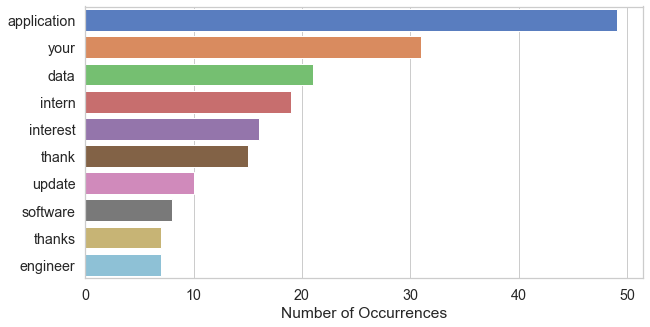

In [27]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');

## Common Body Words and Phrases

In [19]:
# Tokenize and remove stop words
subject_str = df['Text'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

In [20]:
# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()<>//``//]|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

In [21]:
# Get most common words
words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

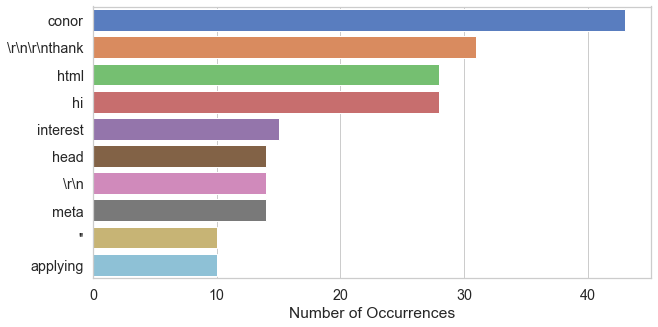

In [22]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');